# Behavioral Cloning Project
## Exploration of the data 

### Import libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import cv2
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

### Explore data 

In [2]:
data = pd.read_csv('simulator_data/driving_log.csv', header=None, index_col=False)
data.head()

,0,1,2,3,4,5,6
0,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,0.0,0.0,0,4.031484e-06
1,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,0.0,0.0,0,9.378605e-07
2,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,0.0,0.0,0,1.948278e-06
3,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,0.0,0.0,0,1.396496e-06
4,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,0.0,0.0,0,2.844180e-06


In [3]:
data.columns = ['center', 'left', 'right', 'steer', 'throttle', 'brake', 'speed']

In [4]:
data.head()

,center,left,right,steer,throttle,brake,speed
0,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,0.0,0.0,0,4.031484e-06
1,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,0.0,0.0,0,9.378605e-07
2,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,0.0,0.0,0,1.948278e-06
3,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,0.0,0.0,0,1.396496e-06
4,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,/Users/lohar/Dropbox/PSDOX/CODE/Algorithms_and...,0.0,0.0,0,2.844180e-06


## Summary of data set
* Y is steering values, ranges between -1 and 1. Right turns are positive values, left turns are negative values (check exploration of Y below).

## Create a training dataset
* The data (X) are the images, and the labels (Y) are the steering values. 
* X = right, center, left images. 
    * X = A concatention of individual image-sets created from the csv-created dataframe.
    * Concatenate corresponding Ys. 
    * Sent through reshape() to reshape. 
    * Split into X_train, X_valid and X_test sets. 
* Ys = concatenate(Y_center, Y_left, Y_right)
    * All 3 initially have the same steering angle which doesn't make sense. The steering angle from the POV of the right-camera > steering angle from the center-camera > steering angle from the left-camera. Initially, we will simply choose a displacement value -  I'm setting this to be the standard deviation (0.16 - check cells below.)
    * You want to move the car to the center always, w.l.o.g. Hence, if you're pulling slightly to the right normally (equivalent to the center camera), you want to pull *more* to the right when the image looks like the left-camera, and less when it looks like the right-camera image. 

In [5]:
X_center = np.array(data.center.apply(mpimg.imread))
X_left = np.array(data.left.apply(mpimg.imread))
X_right = np.array(data.right.apply(mpimg.imread))
X = np.concatenate((X_center, X_left, X_right))

In [6]:
print(X.shape, type(X))

(8385,) <class 'numpy.ndarray'>


In [7]:
print(X[20].shape, type(X[20]))

(160, 320, 3) <class 'numpy.ndarray'>


In [8]:
# double check X.shape
len(data)*3

8385

In [9]:
type(min(X[20][0][0])) # check type of data inside the image, appears to be non-negative and uint8.

numpy.uint8

In [10]:
def reshape(X):
    X_new = np.zeros([X.shape[0], *X[0].shape], dtype =  np.uint8 )
    for i, _ in enumerate(X):
        X_new[i] = X[i]
    return X_new

In [11]:
X = reshape(X)

In [12]:
X.shape

(8385, 160, 320, 3)

In [13]:
displacement = 0.16
Y_center = np.array(data.steer)
Y_left = Y_center + displacement
Y_right = Y_center - displacement

In [14]:
Y = np.concatenate((Y_center, Y_left, Y_right))

In [15]:
Y.shape

(8385,)

In [16]:
print(type(Y[0]), max(Y), min(Y), np.mean(Y))

<class 'numpy.float64'> 1.16 -1.16 -0.0333893028823


In [17]:
data.steer.describe()

count    2795.000000
mean       -0.033389
std         0.162217
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: steer, dtype: float64

In [18]:
np.unique(data.steer) # get an idea of what the values look like - how many decimal points, etc. 
# The std dev provides us some of this info as well.

array([-1.        , -0.9651011 , -0.961834  , -0.9500002 , -0.924536  ,
       -0.9195208 , -0.8500001 , -0.8236659 , -0.8151882 , -0.8000001 ,
       -0.7946991 , -0.7946583 , -0.774931  , -0.774536  , -0.7710571 ,
       -0.7500002 , -0.7428445 , -0.7296219 , -0.7135858 , -0.6954792 ,
       -0.6841047 , -0.6736658 , -0.6582028 , -0.6500001 , -0.623337  ,
       -0.6130199 , -0.6040531 , -0.6000001 , -0.594988  , -0.594699  ,
       -0.5745601 , -0.5657728 , -0.564256  , -0.5591755 , -0.5520607 ,
       -0.5500001 , -0.5476888 , -0.542787  , -0.5352479 , -0.524278  ,
       -0.5210311 , -0.5135857 , -0.5096909 , -0.506103  , -0.5000001 ,
       -0.494904  , -0.490647  , -0.4780229 , -0.4684348 , -0.4673551 ,
       -0.4611211 , -0.4571263 , -0.4537409 , -0.4504291 , -0.45      ,
       -0.4497389 , -0.4370849 , -0.43705   , -0.4360351 , -0.4333738 ,
       -0.430521  , -0.4284511 , -0.4275749 , -0.420015  , -0.4196757 ,
       -0.4179237 , -0.4167239 , -0.4142309 , -0.4129751 , -0.41

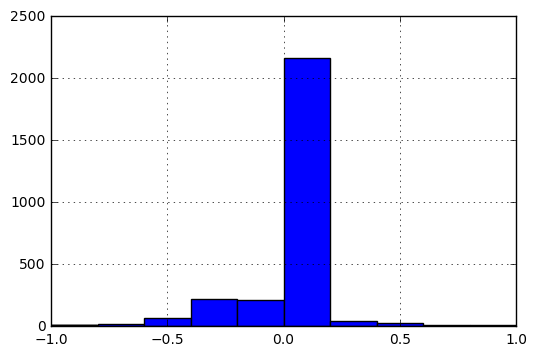

In [23]:
data.steer.hist()

### Steering value 0.0 represents the bulk of the dataset which is not in the least surprising. There are a significant number of stable or resting states where no steering is required, i.e., the steering angle is 0. Since we are interested in states where steering is required (that's what our model is trying to learn), the distribution of non-zero values is far more useful:

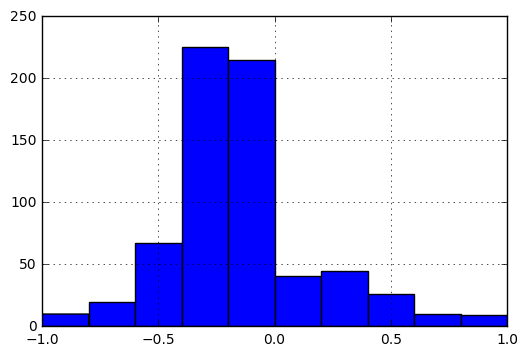

In [27]:
(data.steer[data['steer'] != 0]).hist()

### The data now appears less skewed, approximating a normal distribution. 

In [28]:
Y.dtype

dtype('float64')

### Augmenting data by flipping the image horizontally. 

In [29]:
# augment data
def augment_data(X, y):
    X_new = np.zeros([X.shape[0]*2, *X.shape[1:]], dtype=np.uint8)
    y_new = np.zeros([y.shape[0]*2, *y.shape[1:]], dtype=np.float64)
    for i, _ in enumerate(X):
        X_new[i] = X[i]
        y_new[i] = y[i]
        X_new[i+1] = np.fliplr(X[i])
        y_new[i+1] = -1.0*y[i]
    return X_new, y_new    
    

In [30]:
X, Y = augment_data(X, Y)

In [31]:
print(X.shape, Y.shape)

(16770, 160, 320, 3) (16770,)


### Creating train, validation and test data sets. 

In [32]:
# shuffle X, Y now. Then split in the 3 data sets. 
from sklearn.utils import shuffle
X, Y = shuffle(X, Y)

In [33]:
last_tenth = int(0.9*len(X))
X_test = X[last_tenth:]
y_test = Y[last_tenth:]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X[:last_tenth], Y[:last_tenth], test_size=0.25, random_state=13)

In [35]:
print(X_train.shape, y_train.shape)

(11319, 160, 320, 3) (11319,)


In [36]:
print(X_valid.shape, y_valid.shape)

(3774, 160, 320, 3) (3774,)


In [37]:
print(X_test.shape, y_test.shape)

(1677, 160, 320, 3) (1677,)


### Models
* 3 models - 
    * Basic - just to confirm the pipeline's working. The car barely drives. 
    * LeNet - gives good results - the car drives excellently, but goes completely off the track once. 
    * Nvidia - gives excellent results - drives mistake-free for an indefinite number of laps. This is our final model. 

In [93]:
# our Keras model # basic, just to see if the pipeline is working
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers.convolutional import Convolution2D

def model_basic(X_train, y_train, X_valid, y_valid): 
    model = Sequential()
    model.add(Flatten(input_shape=(160,320,3)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid)) # default epochs=10, default batch_size = 32
    model.save('model_basic.h5')

model_basic(X_train, y_train, X_valid, y_valid)    

Using TensorFlow backend.


Train on 5055 samples, validate on 2491 samples
Epoch 1/10
5055/5055 [==============================] - 10s - loss: 11565623.4775 - val_loss: 12533.2820
Epoch 2/10
5055/5055 [==============================] - 7s - loss: 5758.0962 - val_loss: 3036.2135
Epoch 3/10
5055/5055 [==============================] - 7s - loss: 3198.8927 - val_loss: 2703.6173
Epoch 4/10
5055/5055 [==============================] - 8s - loss: 2508.8065 - val_loss: 2810.3416
Epoch 5/10
5055/5055 [==============================] - 7s - loss: 2413.2011 - val_loss: 1567.0189
Epoch 6/10
5055/5055 [==============================] - 7s - loss: 2579.7226 - val_loss: 1927.2532
Epoch 7/10
5055/5055 [==============================] - 8s - loss: 1929.2491 - val_loss: 1863.0621
Epoch 8/10
5055/5055 [==============================] - 7s - loss: 2101.5050 - val_loss: 2469.8523
Epoch 9/10
5055/5055 [==============================] - 7s - loss: 2135.4561 - val_loss: 6434.9844
Epoch 10/10
5055/5055 [==============================] 

In [159]:
def model_LeNet(X_train, y_train, X_valid, y_valid):
    model = Sequential()
    model.add(Cropping2D(cropping=((70,25), (1,1)), input_shape=(160,320,3)))
    model.add(Lambda(lambda x : (x -128.)/ 128.))
    print("model shape is ", model.output_shape)
    model.add(Convolution2D(6,5,5, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Convolution2D(6,5,5, activation='relu'))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Dense(84))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=128, nb_epoch=5) # default epochs=10, default batch_size = 32
    model.save('model_lenet.h5')
    

In [160]:
model_LeNet(X_train, y_train, X_valid, y_valid)

model shape is  (None, 65, 318, 3)
Train on 11319 samples, validate on 3774 samples
Epoch 1/5
11319/11319 [==============================] - 383s - loss: 5.2987 - val_loss: 0.0227
Epoch 2/5
11319/11319 [==============================] - 361s - loss: 0.0230 - val_loss: 0.0208
Epoch 3/5
11319/11319 [==============================] - 324s - loss: 0.0218 - val_loss: 0.0197
Epoch 4/5
11319/11319 [==============================] - 327s - loss: 0.0207 - val_loss: 0.0189
Epoch 5/5
11319/11319 [==============================] - 322s - loss: 0.0199 - val_loss: 0.0182


model shape is  (None, 65, 318, 3)
Train on 11319 samples, validate on 3774 samples
Epoch 1/10
11319/11319 [==============================] - 254s - loss: 0.0210 - val_loss: 0.0155
Epoch 2/10
11319/11319 [==============================] - 255s - loss: 0.0173 - val_loss: 0.0141
Epoch 3/10
11319/11319 [==============================] - 237s - loss: 0.0160 - val_loss: 0.0130
Epoch 4/10
11319/11319 [==============================] - 240s - loss: 0.0149 - val_loss: 0.0117
Epoch 5/10
11319/11319 [==============================] - 253s - loss: 0.0138 - val_loss: 0.0136
Epoch 6/10
11319/11319 [==============================] - 266s - loss: 0.0137 - val_loss: 0.0114
Epoch 7/10
11319/11319 [==============================] - 231s - loss: 0.0127 - val_loss: 0.0116
Epoch 8/10
11319/11319 [==============================] - 209s - loss: 0.0119 - val_loss: 0.0117
Epoch 9/10
11319/11319 [==============================] - 209s - loss: 0.0119 - val_loss: 0.0105
Epoch 10/10
11319/11319 [==================

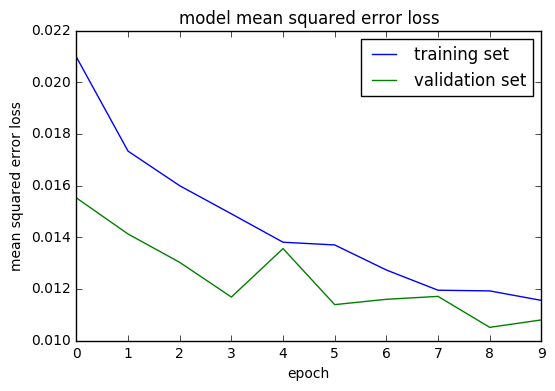

In [42]:
def model_nvidia(X_train, y_train, X_valid, y_valid):
    model = Sequential()
    model.add(Cropping2D(cropping=((70,25), (1,1)), input_shape=(160,320,3)))
    model.add(Lambda(lambda x : (x -128.)/ 128.))
    print("model shape is ", model.output_shape)
    model.add(Convolution2D(24,5,5, subsample =(2,2), activation='relu'))
    model.add(Convolution2D(36,5,5, subsample =(2,2), activation='relu'))
    model.add(Convolution2D(48,5,5, subsample =(2,2), activation='relu'))
    model.add(Convolution2D(64,3,3, activation='relu'))
    model.add(Convolution2D(64,3,3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    history_obj = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=128, nb_epoch=10) # default epochs=10, default batch_size = 32
    display_loss(history_obj)
    model.save('model_nvidia.h5')
 
model_nvidia(X_train, y_train, X_valid, y_valid)    

In [40]:
def display_loss(history_obj):
    ### print the keys contained in the history object
    print(history_obj.history.keys())

    ### plot the training and validation loss for each epoch
    plt.plot(history_obj.history['loss'])
    plt.plot(history_obj.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.show()